# Interoperability in Julia
The `Interoperability` notebook is a collection of examples of how to use Julia to interact with other languages.

**Content of the notebook:**
* [Julia and Python](#julia-and-python)
* [Julia and R, RCall](#julia-and-r)

## Julia and Python <a id='julia-and-python'></a>

In [3]:
# using Pkg; Pkg.add("PyCall")
using PyCall

In [5]:
py"print('Hello World from Python!')"

Hello World from Python!


In [8]:
# In python we use ** instead of ^ for powers
py_var = py"2**3"
jl_var = 2^3

py_var == jl_var

true

In [14]:
# Import modules
math = pyimport("math")

x = -2π:0.01:2π # Julia array
y = math.sin.(x) # Sin(x) using math python module

typeof(y) # Julia array

Vector{Float64} (alias for Array{Float64, 1})

In [16]:
plt = pyimport("matplotlib.pyplot")

plt.plot(x, y, color="red", linewidth=2.0, linestyle="--")
plt.show() # This wil open a new window, clearly not optimal 

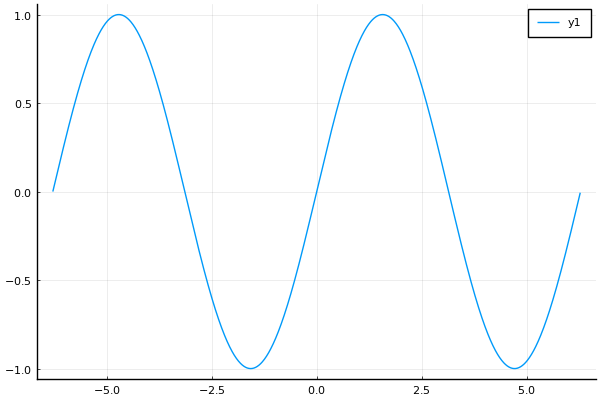

In [19]:
# If we want to use python pyplot to plot we can use the version that 
# is implemented in Julia
# using Pkg; Pkg.add("PyPlot")
using Plots
pyplot()

plot(x,y)

## Julia and R, RCall <a id='julia-and-r'></a>

In [25]:
# using Pkg; Pkg.add("RCall")
using RCall

R"print('Hello World from R!')"

[1] "Hello World from R!"


RObject{StrSxp}
[1] "Hello World from R!"


In [27]:
r_var = R"2^3" # R